In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap

In [2]:
np.random.seed(765) # set random seed

In [3]:
df = pd.read_csv('/project/dsc-is/mahfujul-r/M/128/14/HHH14 & C14 & D14.csv', header=None) # load dataframe
df.rename(columns={128: 'class'}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,class,129
0,0.004784,0.012475,0.011716,0.009021,0.006642,0.012943,0.004191,0.004943,0.004183,0.006566,...,0.009744,0.004658,0.006658,0.021033,0.004273,0.004756,0.004769,0.032422,0,0.999756
1,0.009645,0.005727,0.004171,0.009988,0.003320,0.003429,0.004720,0.014084,0.009002,0.008177,...,0.009638,0.010183,0.013852,0.003485,0.003975,0.026042,0.005153,0.003996,5,0.873377
2,0.008350,0.006269,0.010316,0.005512,0.004943,0.005231,0.005356,0.005942,0.007563,0.009243,...,0.005261,0.009316,0.005160,0.004756,0.004879,0.005214,0.004936,0.005883,12,0.994874
3,0.007015,0.009327,0.005025,0.005530,0.006293,0.008524,0.004017,0.007749,0.008078,0.015763,...,0.006891,0.005511,0.011224,0.011254,0.003714,0.005004,0.004735,0.009849,13,0.999999
4,0.006878,0.007417,0.010349,0.006365,0.004858,0.005066,0.006187,0.005611,0.008878,0.010910,...,0.005008,0.005929,0.005298,0.004628,0.004887,0.005408,0.006025,0.009512,12,0.999961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.004365,0.004609,0.004268,0.011555,0.015211,0.004618,0.005052,0.004776,0.005294,0.005834,...,0.007901,0.005746,0.004314,0.006528,0.030697,0.005092,0.004998,0.004561,11,0.993584
14996,0.003939,0.003979,0.003792,0.014338,0.016109,0.004187,0.004097,0.004314,0.004685,0.006374,...,0.007478,0.004942,0.003913,0.006841,0.024365,0.004537,0.003858,0.004069,7,0.997923
14997,0.004792,0.004776,0.004863,0.008651,0.012934,0.004976,0.011675,0.004961,0.004834,0.005319,...,0.006318,0.005549,0.004495,0.005526,0.030967,0.005178,0.012393,0.005074,11,0.815366
14998,0.005352,0.011324,0.013623,0.007926,0.007095,0.007255,0.004894,0.005320,0.004616,0.007986,...,0.007340,0.005142,0.006285,0.010861,0.004635,0.004918,0.005408,0.029521,0,0.998336


In [4]:
# separate features and labels

features = df.loc[:, 0:127]
target = df.loc[:, 'class']

In [5]:
# reduce dimension using umap

reduce = umap.UMAP(n_components=2, random_state=765)
embedding = reduce.fit_transform(features)

In [6]:
# visualize umap

Xax = embedding[:, 0]
Yax = embedding[:, 1]

In [7]:
cdict = {0: 'r', 1: 'g', 2: 'b', 3: 'm', 4: 'k', 5: 'c', 6: 'yellow', 7: 'olive', 8: 'lime', 9: 'navy', 10: 'orange',
         11: 'gold', 12: 'pink', 13: 'darkviolet'}
labl = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10', 10: '11', 11: '12', 12: '13',
        13: '14'}
marker = {0: 'o', 1: 'v', 2: '*', 3: '+', 4: 'x', 5: 'd', 6: 's', 7: 'p', 8: ',', 9: '^', 10: '<', 11: '>', 12: '.', 13: '1'}
alpha = {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.5, 8: 0.5, 9: 0.5, 10: 0.5, 11: 0.5, 12: 0.5, 13: 0.5}

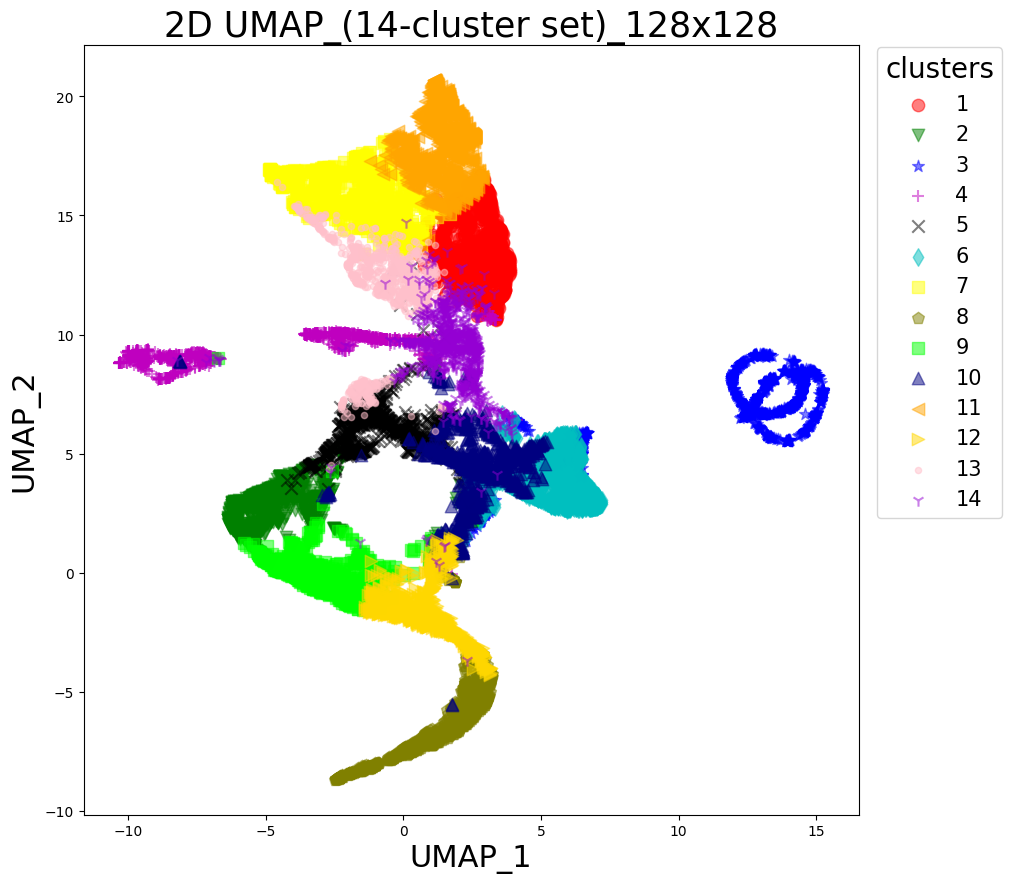

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
fig.patch.set_facecolor('white')
for k in np.unique(target):
    ix = np.where(target==k)
    ax.scatter(Xax[ix], Yax[ix], c=cdict[k], s=80, label=labl[k], marker=marker[k], alpha=alpha[k])
ax.set_xlabel('UMAP_1', fontsize=22)
ax.set_ylabel('UMAP_2', fontsize=22)
ax.legend(title='clusters', bbox_to_anchor=(1.01, 1.01), fontsize=15, title_fontsize=20)
ax.set_title('2D UMAP_(14-cluster set)_128x128', fontsize=25);